In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [47]:
# Define a function to standardize column names and extract common columns
def standardize_df(df, year):
    rename_dict = {
        'Country or region': 'Country',
        'Country': 'Country',

        'Happiness.Rank': 'Happiness Rank',
        'Overall rank': 'Happiness Rank',
        'Happiness Rank': 'Happiness Rank',

        'Score': 'Happiness Score',
        'Happiness.Score': 'Happiness Score',
        'Happiness Score': 'Happiness Score',

        'Economy (GDP per Capita)': 'GDP per Capita',
        'Economy..GDP.per.Capita.': 'GDP per Capita',
        'GDP per capita': 'GDP per Capita',

        'Family': 'Social Support',
        'Social support': 'Social Support',

        'Health (Life Expectancy)': 'Healthy Life Expectancy',
        'Health..Life.Expectancy.': 'Healthy Life Expectancy',
        'Healthy life expectancy': 'Healthy Life Expectancy',

        'Freedom': 'Freedom',
        'Freedom to make life choices': 'Freedom',

        'Trust (Government Corruption)': 'Perceptions of Corruption',
        'Trust..Government.Corruption.': 'Perceptions of Corruption',
        'Perceptions of corruption': 'Perceptions of Corruption'
    }
    df = df.rename(columns=rename_dict)
    common_columns = [
        'Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita',
        'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity',
        'Perceptions of Corruption'
    ]
    common_columns = [col for col in common_columns if col in df.columns]
    df = df[common_columns]
    df['Year'] = year
    return df

# Load the datasets for the years 2015 to 2019
file_paths = {
    '2015': '2015.csv',
    '2016': '2016.csv',
    '2017': '2017.csv',
    '2018': '2018.csv',
    '2019': '2019.csv'
}

# # Initialize an empty dictionary to store the dataframes
# happiness_data = {}

# # Load the data for each year
# for year, path in file_paths.items():
#     happiness_data[year] = pd.read_csv(path)

# # Apply the function to each dataframe
# standardized_dfs = {}
# for year, df in happiness_data.items():
#     standardized_dfs[year] = standardize_df(df, year)

# # Check if all the countries are the same across the datasets
# countries = [set(df['Country']) for df in standardized_dfs.values()]
# common_countries = set.intersection(*countries)

# # If all countries are the same, we will use the 'Region' column from 2015 and map it to other datasets
# if all(len(common_countries) == len(df['Country']) for df in standardized_dfs.values()):
#     region_mapping = happiness_data['2015'].set_index('Country')['Region'].to_dict()
#     for df in standardized_dfs.values():
#         df['Region'] = df['Country'].map(region_mapping)

# # Concatenate the standardized dataframes into one
# combined_happiness_data = pd.concat(standardized_dfs.values(), ignore_index=True)

# # Display the standardized and combined dataframe
# combined_happiness_data.head()

# Initialize an empty dictionary to store the dataframes
happiness_data = {}

# Load the data for each year
for year, path in file_paths.items():
    happiness_data[year] = pd.read_csv(path)

# Apply the function to each dataframe
standardized_dfs = {}
for year, df in happiness_data.items():
    standardized_dfs[year] = standardize_df(df, year)

# Check if all the countries are the same across the datasets
countries = [set(df['Country']) for df in standardized_dfs.values()]
common_countries = set.intersection(*countries)

# If all countries are the same, we will use the 'Region' column from 2015 and map it to other datasets
if all(len(common_countries) == len(df['Country']) for df in standardized_dfs.values()):
    region_mapping = happiness_data['2015'].set_index('Country')['Region'].to_dict()
    for df in standardized_dfs.values():
        df['Region'] = df['Country'].map(region_mapping)

# Concatenate the standardized dataframes into one
combined_happiness_data = pd.concat(standardized_dfs.values(), ignore_index=True)

# Display the standardized and combined dataframe
combined_happiness_data.head()

,Country,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Perceptions of Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [48]:
combined_happiness_data.to_csv("Combined_Data.csv", index=False)

In [49]:
combined_happiness_data.isna().sum()

Country                      0
Happiness Rank               0
Happiness Score              0
GDP per Capita               0
Social Support               0
Healthy Life Expectancy      0
Freedom                      0
Generosity                   0
Perceptions of Corruption    1
Year                         0
dtype: int64

In [50]:
for year, df in happiness_data.items():
    cols = df.columns.tolist()
    print(f"{year} : {cols}")

2015 : ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2016 : ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2017 : ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
2018 : ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2019 : ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Socia

In [51]:
combined_happiness_data.Country.nunique()

170

In [40]:
for year, df in happiness_data.items():
    num = df.Country.nunique()
    print(f"{num}")
    break

158


# InforGraphic

In [64]:
combined_happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 
 1   Happiness Rank             782 non-null    int64  
 2   Happiness Score            782 non-null    float64
 3   GDP per Capita             782 non-null    float64
 4   Social Support             782 non-null    float64
 5   Healthy Life Expectancy    782 non-null    float64
 6   Freedom                    782 non-null    float64
 7   Generosity                 782 non-null    float64
 8   Perceptions of Corruption  781 non-null    float64
 9   Year                       782 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 61.2+ KB


In [ ]:
# Convert 'Year' to a numeric type for plotting
combined_happiness_data['Year'] = pd.to_numeric(combined_happiness_data['Year'])

In [70]:
combined_happiness_data.to_csv("Combined_Data.csv", index=False)

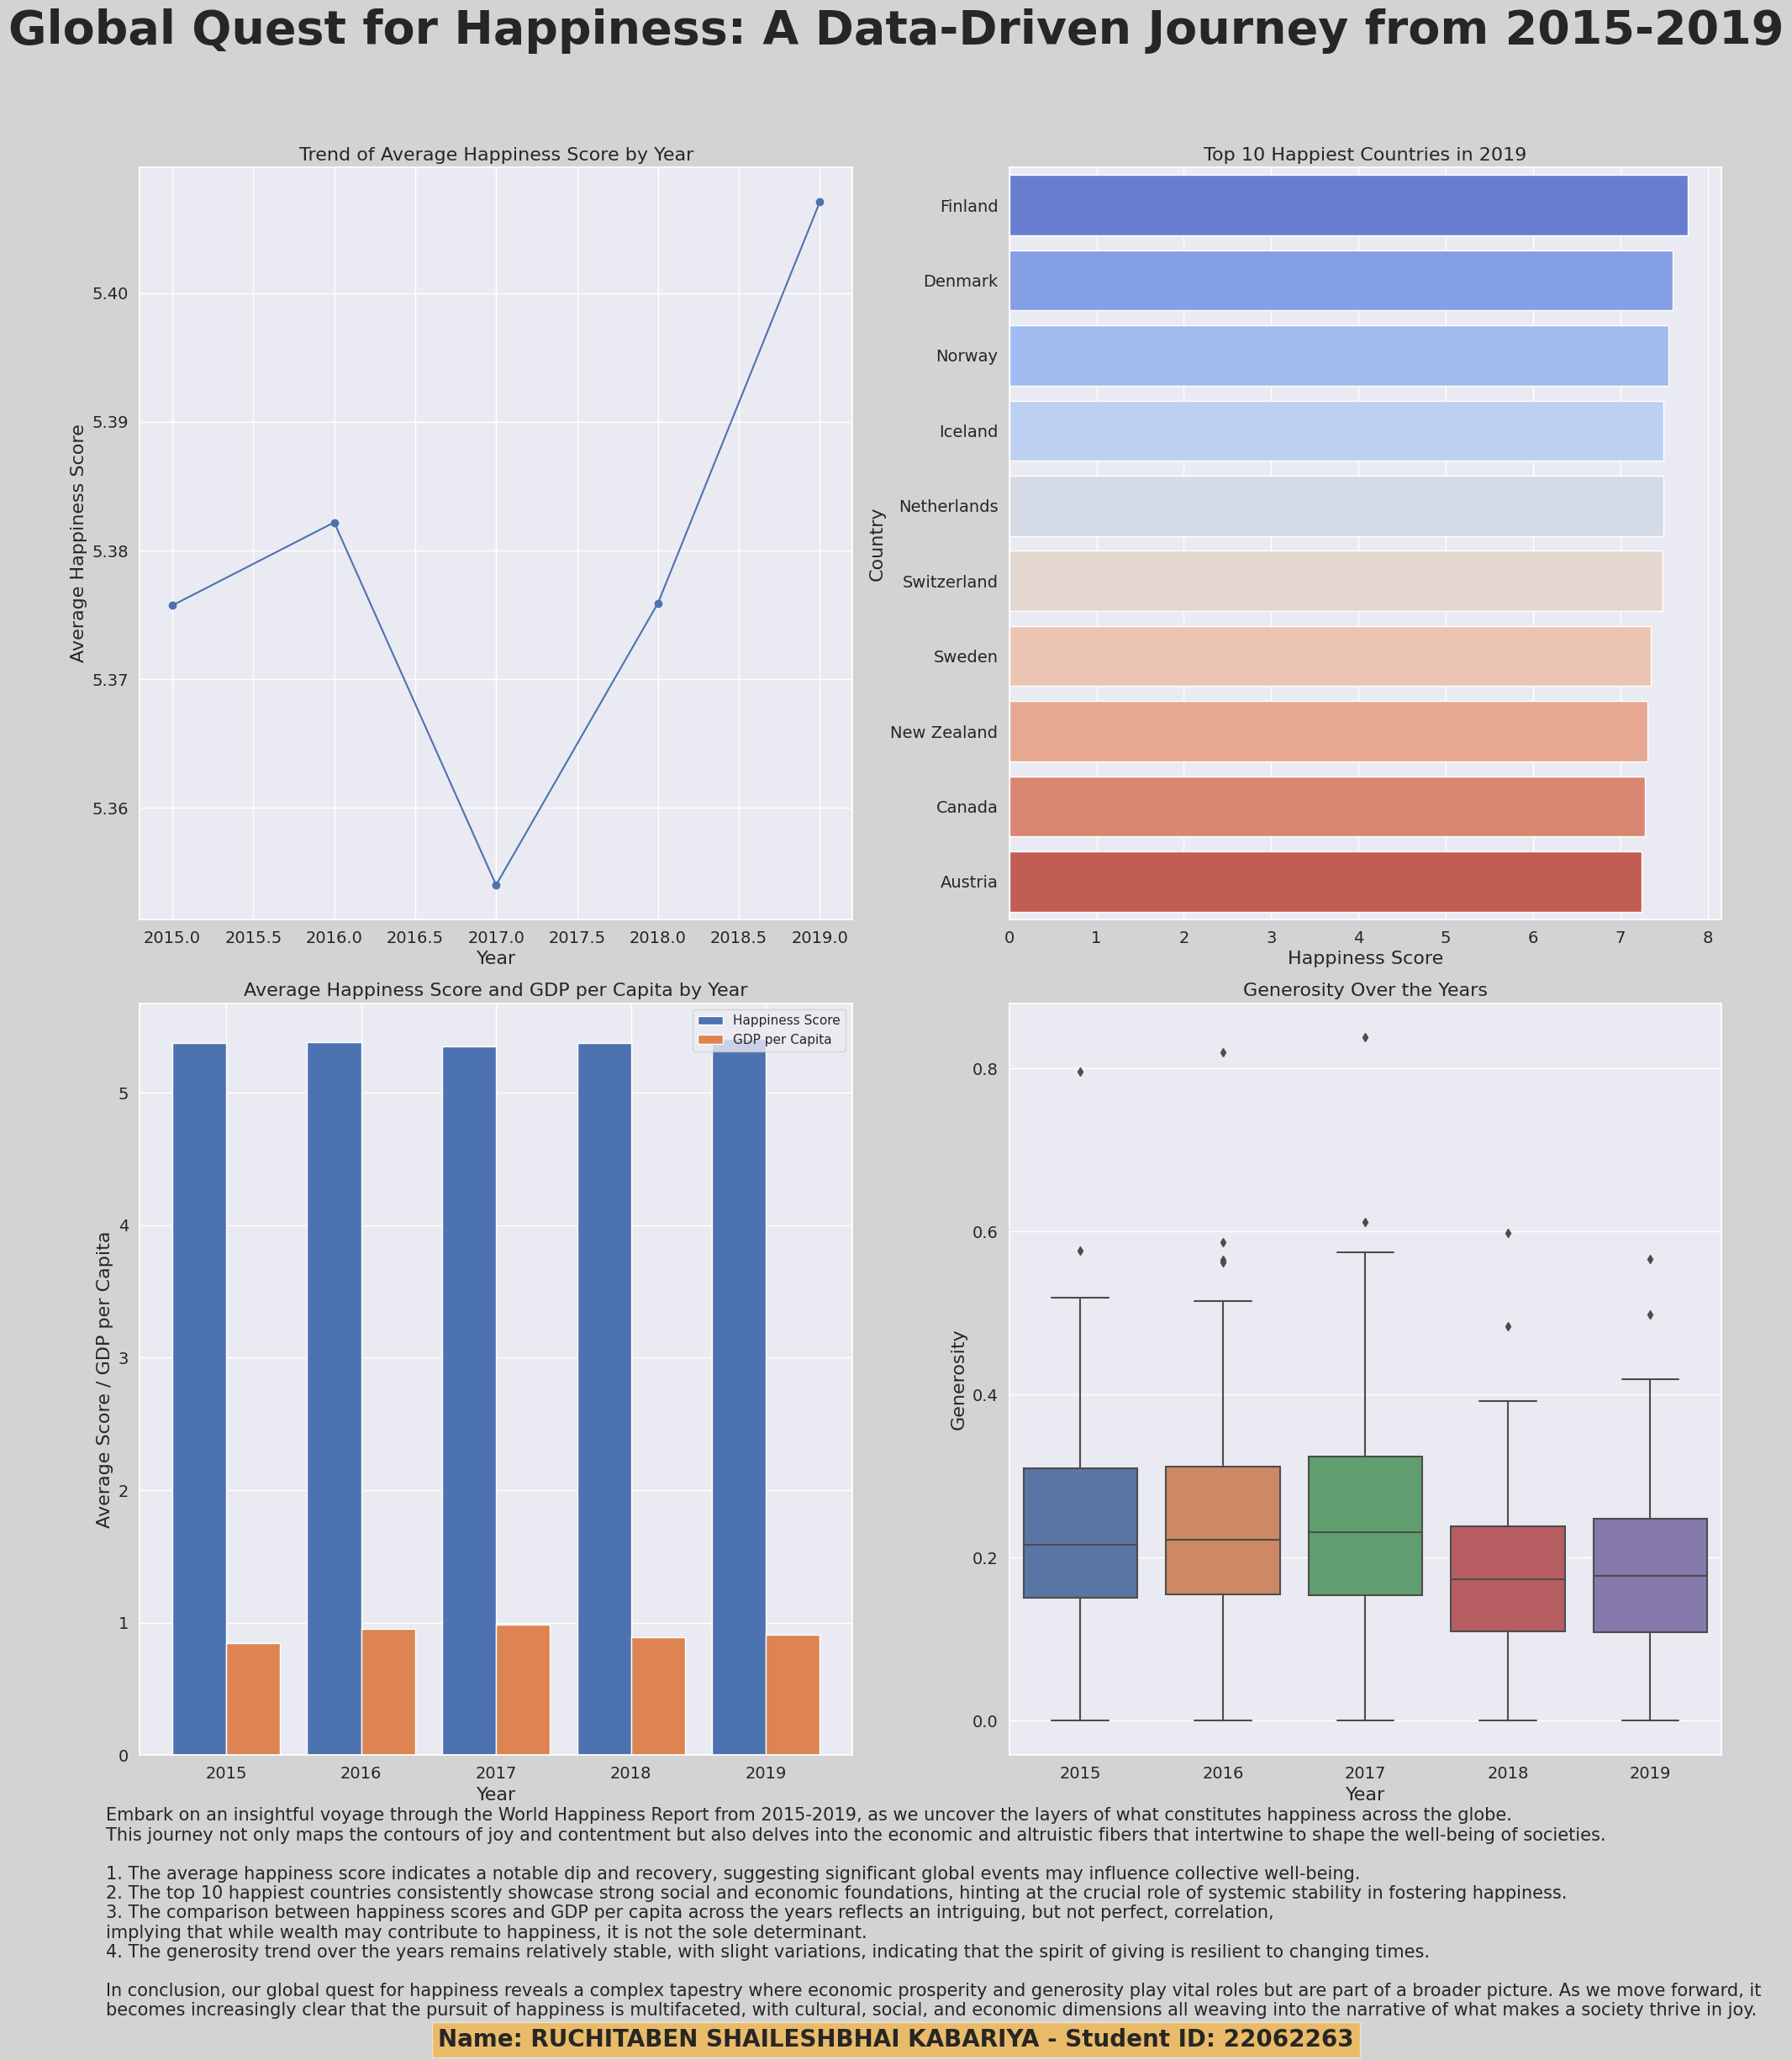

In [129]:
#Final
# Set the style for the plots
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 12})

# Define the figure for the infographic
fig, axes = plt.subplots(3, 2, figsize=(20, 25), gridspec_kw={'height_ratios': [1, 1, 0.2]})
fig.suptitle('Global Quest for Happiness: A Data-Driven Journey from 2015-2019', fontsize=40, fontweight='bold')
fig.set_facecolor('lightgray')

# Title and Student ID
plt.figtext(0.5, 0.01, "Name: RUCHITABEN SHAILESHBHAI KABARIYA - Student ID: 22062263", ha="center", fontsize=20, fontweight='bold', bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Plot 1: Average happiness score by year
avg_happiness_by_year = combined_happiness_data.groupby('Year')['Happiness Score'].mean()
axes[0, 0].plot(avg_happiness_by_year.index, avg_happiness_by_year.values, marker='o', color='b')
axes[0, 0].set_title('Trend of Average Happiness Score by Year', fontsize=16)
axes[0, 0].set_xlabel('Year', fontsize=16)
axes[0, 0].set_ylabel('Average Happiness Score', fontsize=16)
axes[0, 0].tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size

# Plot 2: Top 10 countries with the highest happiness score in the latest year
latest_year = combined_happiness_data['Year'].max()
top_countries_latest_year = combined_happiness_data[combined_happiness_data['Year'] == latest_year].nlargest(10, 'Happiness Score')
sns.barplot(x='Happiness Score', y='Country', data=top_countries_latest_year, ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title(f'Top 10 Happiest Countries in {latest_year}', fontsize=16)
axes[0, 1].set_xlabel('Happiness Score', fontsize=16)
axes[0, 1].set_ylabel('Country', fontsize=16)
axes[0, 1].tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size


# Plot 3: Average GDP per Capita and Happiness Score by Year
avg_gdp_happiness_by_year = combined_happiness_data.groupby('Year')[['Happiness Score', 'GDP per Capita']].mean()
axes[1, 0].bar(avg_gdp_happiness_by_year.index - 0.2, avg_gdp_happiness_by_year['Happiness Score'], width=0.4, label='Happiness Score', align='center')
axes[1, 0].bar(avg_gdp_happiness_by_year.index + 0.2, avg_gdp_happiness_by_year['GDP per Capita'], width=0.4, label='GDP per Capita', align='center')
axes[1, 0].set_title('Average Happiness Score and GDP per Capita by Year', fontsize=16)
axes[1, 0].set_xlabel('Year', fontsize=16)
axes[1, 0].set_ylabel('Average Score / GDP per Capita', fontsize=16)
axes[1, 0].legend()
axes[1, 0].tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size

# Plot 4: Generosity Over the Years
sns.boxplot(data=combined_happiness_data, x='Year', y='Generosity', ax=axes[1, 1])
axes[1, 1].set_title('Generosity Over the Years', fontsize=16)
axes[1, 1].set_xlabel('Year', fontsize=16)
axes[1, 1].set_ylabel('Generosity', fontsize=16)
axes[1, 1].tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size


# Enhanced explanations with introduction and conclusion remarks
intro_remark = "Embark on an insightful voyage through the World Happiness Report from 2015-2019, as we uncover the layers of what constitutes happiness across the globe. \nThis journey not only maps the contours of joy and contentment but also delves into the economic and altruistic fibers that intertwine to shape the well-being of societies.\n"
conclusion_remark = "\nIn conclusion, our global quest for happiness reveals a complex tapestry where economic prosperity and generosity play vital roles but are part of a broader picture. As we move forward, it \nbecomes increasingly clear that the pursuit of happiness is multifaceted, with cultural, social, and economic dimensions all weaving into the narrative of what makes a society thrive in joy."
explanations = [
    "1. The average happiness score indicates a notable dip and recovery, suggesting significant global events may influence collective well-being.",
    "2. The top 10 happiest countries consistently showcase strong social and economic foundations, hinting at the crucial role of systemic stability in fostering happiness.",
    "3. The comparison between happiness scores and GDP per capita across the years reflects an intriguing, but not perfect, correlation, \nimplying that while wealth may contribute to happiness, it is not the sole determinant.",
    "4. The generosity trend over the years remains relatively stable, with slight variations, indicating that the spirit of giving is resilient to changing times."
]

axes[2, 0].axis('off')
axes[2, 1].axis('off')

# Explanation text centrally aligned to the figure, below the plots
fig.text(0.03, 0.023, "\n".join([intro_remark] + explanations + [conclusion_remark]), ha='left', va='bottom', fontsize=15)

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()
